###  Molten Salt Review

In this example, we analyse 6 different molten NaCl simulation. In total the raw simulation data was approximately 500 GB. This analysis from start to finish can be performed in apprxoimately 60 minutes. 

In [1]:
import mdsuite as mds
import matplotlib.pyplot as plt
import numpy as np

### Begin a project

In [2]:
Molten_NaCl = mds.Project(name="Molten_NaCl", storage_path="/data/stovey")  # Don't want to store it on my drive

Loading the class state
2021-05-04 15:28:25,566 (INFO) - Created logfile 2021-05-04T15-28-25.log in experiment path /data/stovey/Molten_NaCl_MDSuite_Project/NaCl_1148K/logfiles
2021-05-04 15:28:25,569 (INFO) - Created logfile 2021-05-04T15-28-25.log in experiment path /data/stovey/Molten_NaCl_MDSuite_Project/NaCl_1174K/logfiles
2021-05-04 15:28:25,571 (INFO) - Created logfile 2021-05-04T15-28-25.log in experiment path /data/stovey/Molten_NaCl_MDSuite_Project/NaCl_1300K/logfiles
2021-05-04 15:28:25,575 (INFO) - Created logfile 2021-05-04T15-28-25.log in experiment path /data/stovey/Molten_NaCl_MDSuite_Project/NaCl_1350K/logfiles
2021-05-04 15:28:25,577 (INFO) - Created logfile 2021-05-04T15-28-25.log in experiment path /data/stovey/Molten_NaCl_MDSuite_Project/NaCl_1400K/logfiles
2021-05-04 15:28:25,580 (INFO) - Created logfile 2021-05-04T15-28-25.log in experiment path /data/stovey/Molten_NaCl_MDSuite_Project/NaCl_1450K/logfiles


Molten_NaCl.add_description('ms_info.md')  # we can add a short description

### Prepare the input for multiple experiment additions

In [3]:
temperatures = [1148, 1174, 1300, 1350, 1400, 1450]
file_path = "/beegfs/work/stovey/work/Masters/Masters_Simulations/NaCl/scaledSim/"\
            "Thesis_Sims/tempK/rerun/NaCl_Velocities.xyz"
experiments = {}
data_sets = {}
for temperature in temperatures:
    experiments[f'NaCl_{temperature}K'] = {'time_step': 0.002, 'temperature': temperature, 'units': 'metal'}
    data_sets[f'NaCl_{temperature}K'] = file_path.replace('temp', str(temperature))

In [4]:
Molten_NaCl.add_experiment(experiment=experiments)

This experiment already exists, aborting addition
This experiment already exists, aborting addition
This experiment already exists, aborting addition
This experiment already exists, aborting addition
This experiment already exists, aborting addition
This experiment already exists, aborting addition


Molten_NaCl.add_data(data_sets)

##  Structural Property Analysis

2021-05-04 15:14:27,578 (WARNING) - 
 ########## 
 This is an experimental calculator. It is provided as it can still be used, however, it may not be memory safe or completely accurate. 
 Please see the documentation for more information. 
 #########
2021-05-04 15:14:28,266 (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 21/21 [00:16<00:00,  1.31it/s]


2021-05-04 15:14:46,323 (WARNING) - 
 ########## 
 This is an experimental calculator. It is provided as it can still be used, however, it may not be memory safe or completely accurate. 
 Please see the documentation for more information. 
 #########
2021-05-04 15:14:46,389 (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 23/23 [00:17<00:00,  1.35it/s]


2021-05-04 15:15:04,319 (WARNING) - 
 ########## 
 This is an experimental calculator. It is provided as it can still be used, however, it may not be memory safe or completely accurate. 
 Please see the documentation for more information. 
 #########
2021-05-04 15:15:04,388 (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 23/23 [00:18<00:00,  1.26it/s]


2021-05-04 15:15:23,405 (WARNING) - 
 ########## 
 This is an experimental calculator. It is provided as it can still be used, however, it may not be memory safe or completely accurate. 
 Please see the documentation for more information. 
 #########
2021-05-04 15:15:23,471 (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 23/23 [00:18<00:00,  1.26it/s]


2021-05-04 15:15:42,733 (WARNING) - 
 ########## 
 This is an experimental calculator. It is provided as it can still be used, however, it may not be memory safe or completely accurate. 
 Please see the documentation for more information. 
 #########
2021-05-04 15:15:42,804 (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 23/23 [00:18<00:00,  1.25it/s]


2021-05-04 15:16:02,147 (WARNING) - 
 ########## 
 This is an experimental calculator. It is provided as it can still be used, however, it may not be memory safe or completely accurate. 
 Please see the documentation for more information. 
 #########
2021-05-04 15:16:02,229 (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 23/23 [00:18<00:00,  1.24it/s]


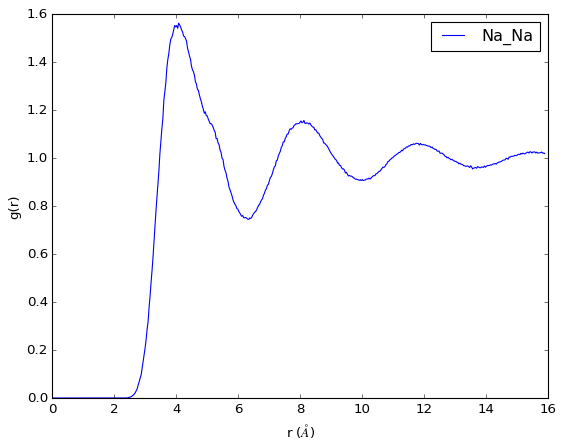

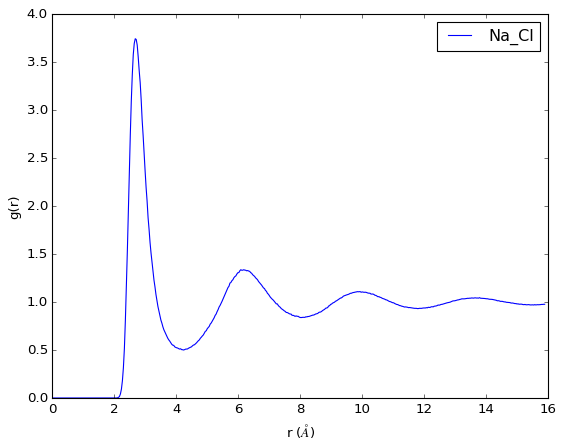

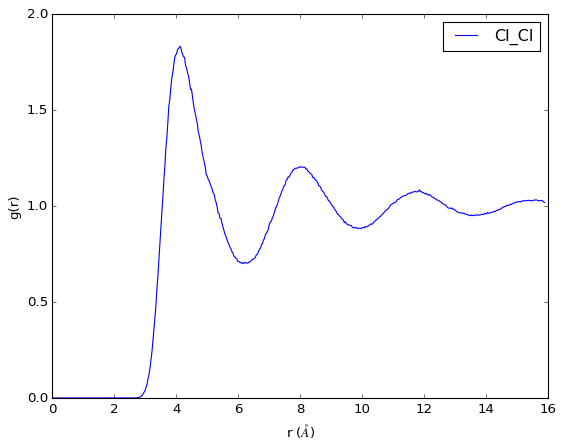

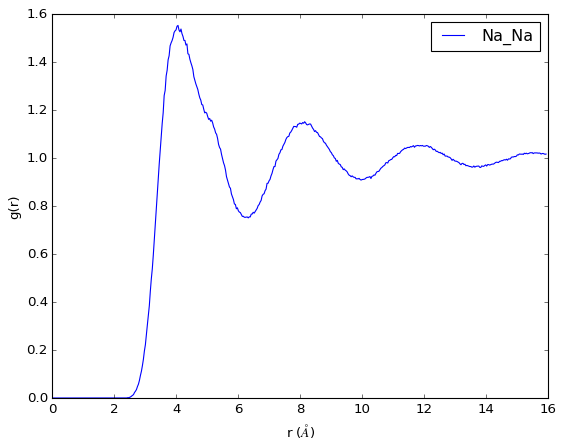

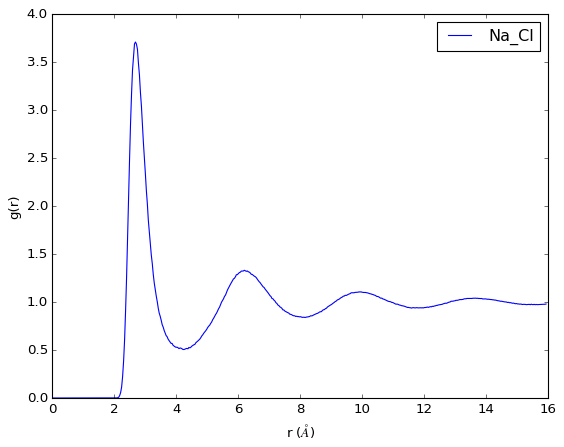

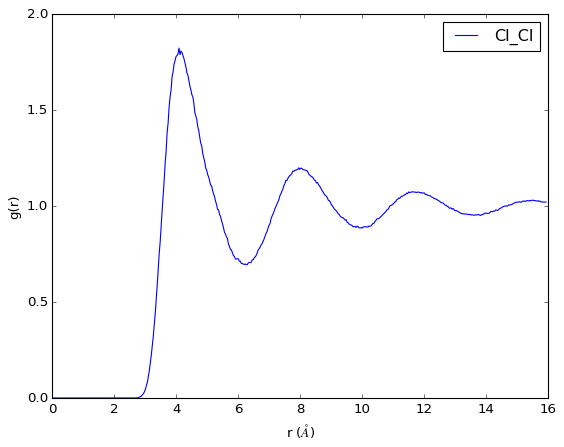

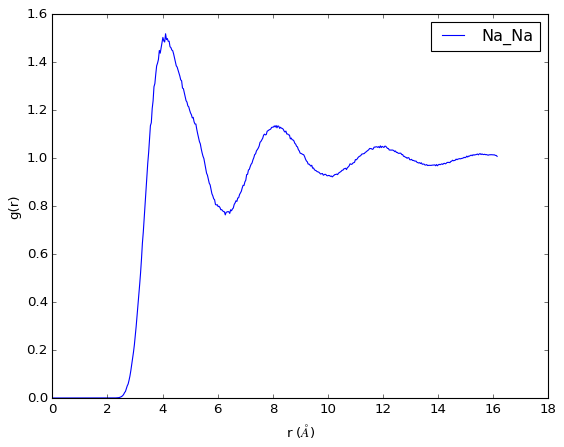

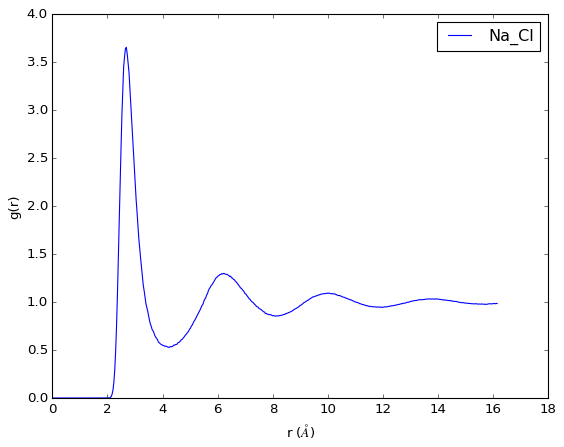

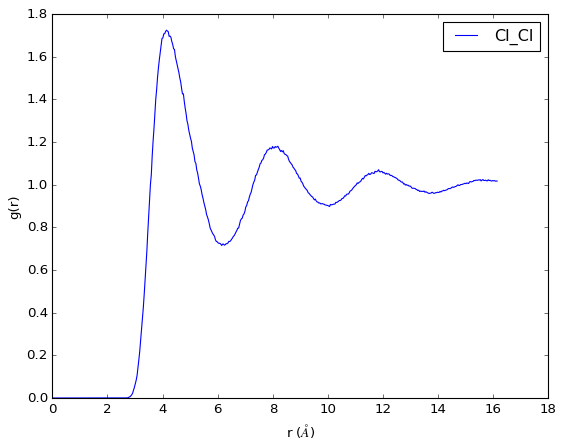

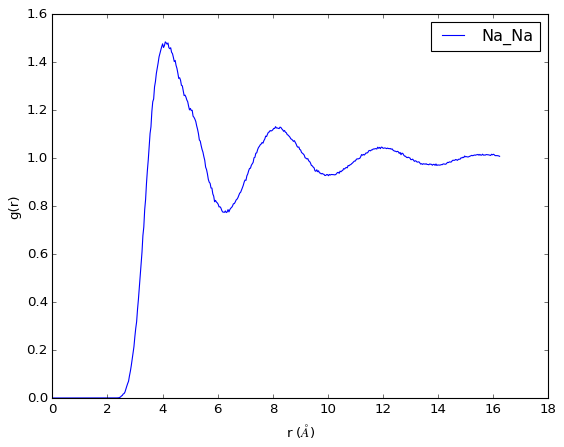

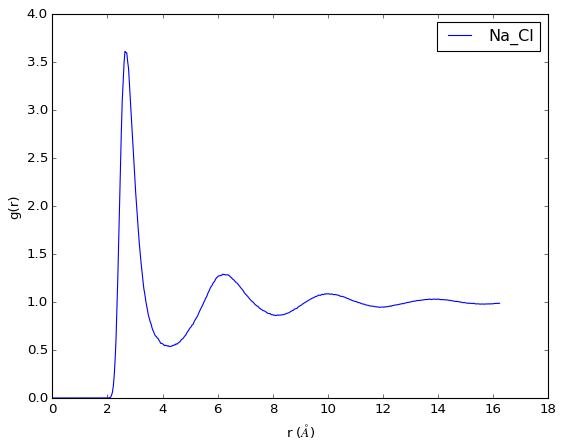

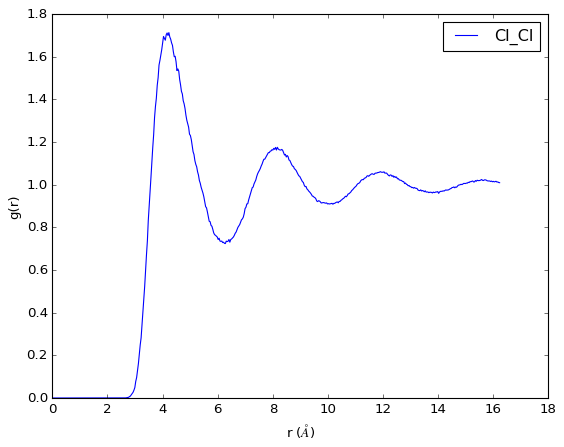

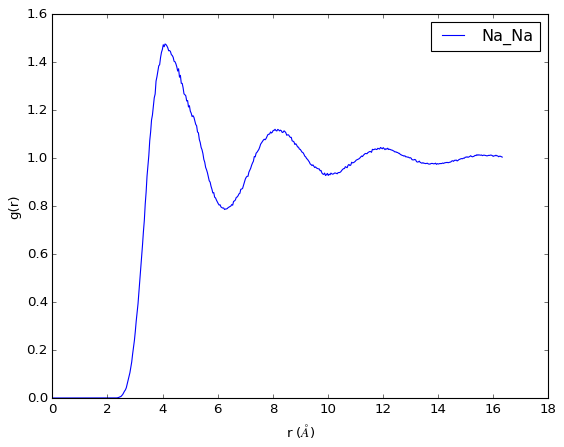

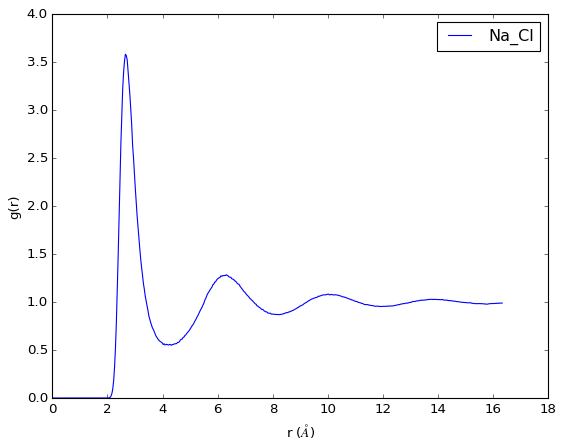

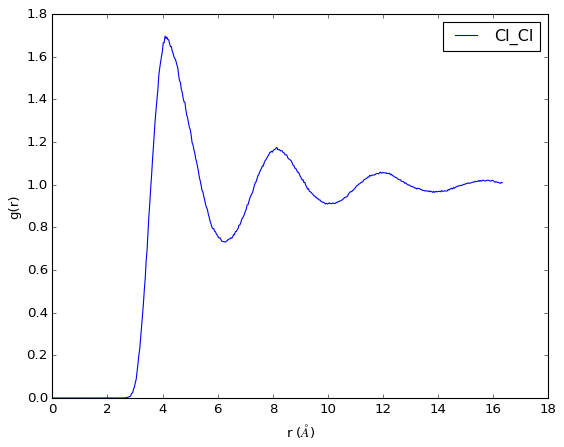

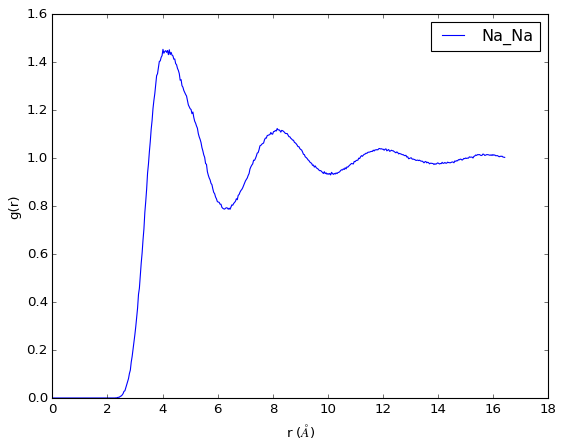

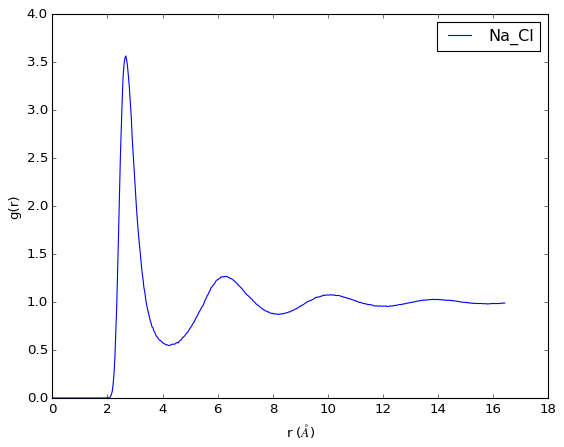

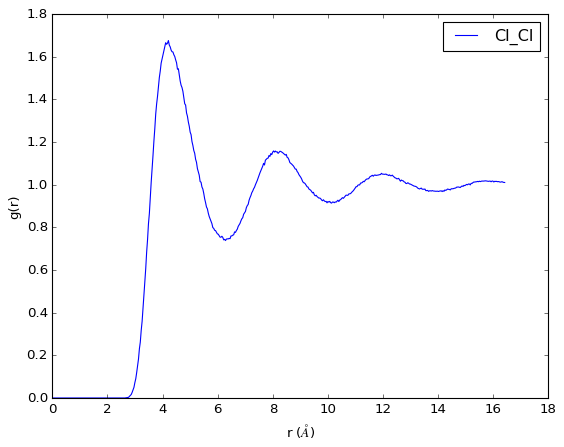

In [5]:
for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.RadialDistributionFunction(plot=False, 
                                                                             start=3000, 
                                                                             stop=8000, 
                                                                             number_of_configurations=1000,
                                                                             number_of_bins=500,
                                                                             gpu=False, minibatch=None)

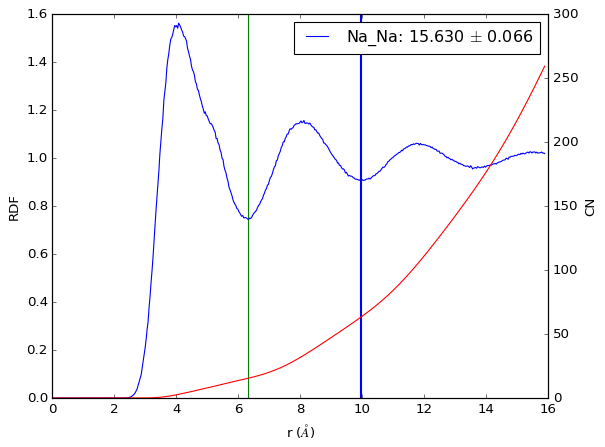

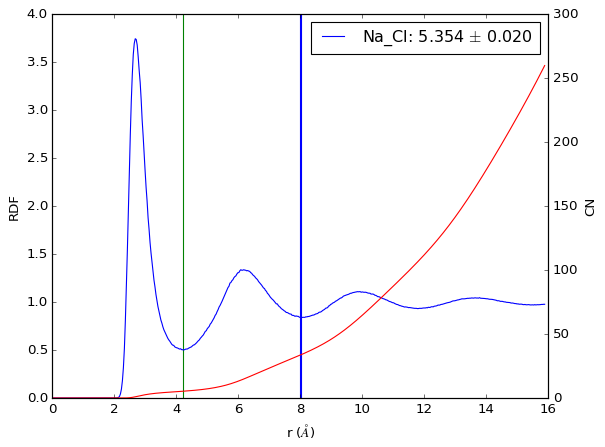

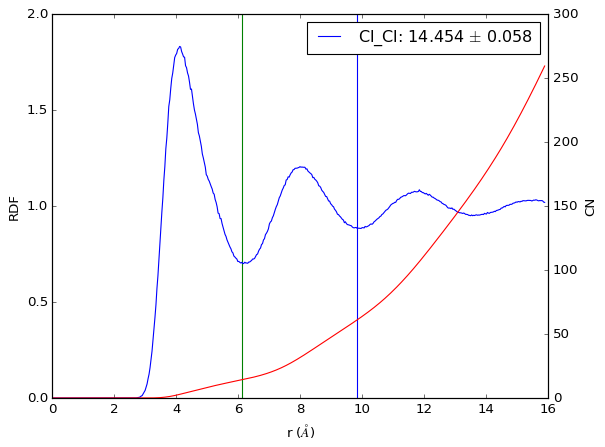

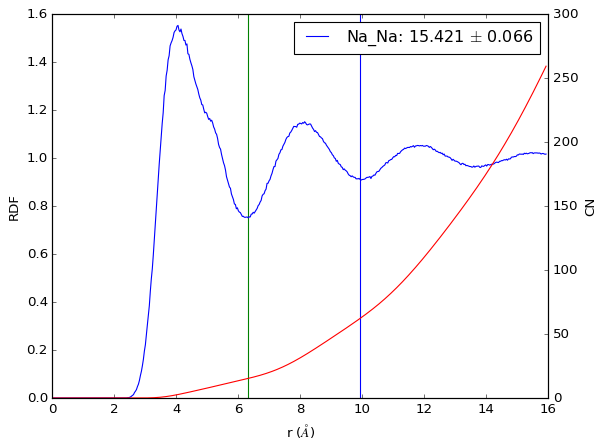

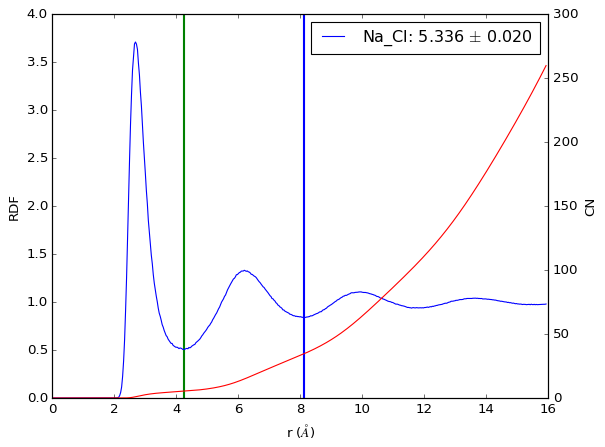

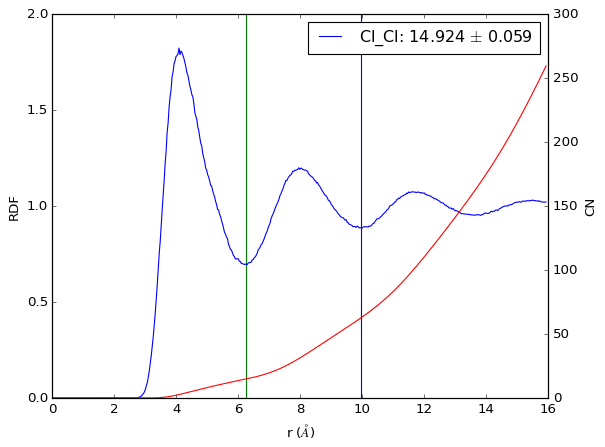

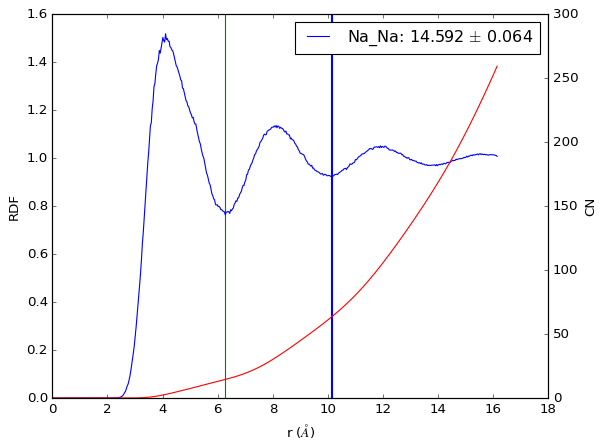

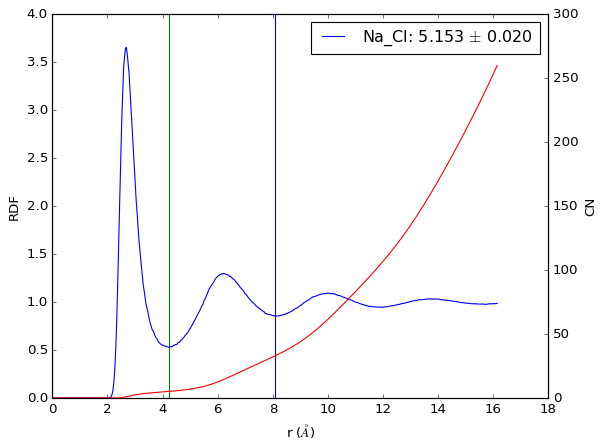

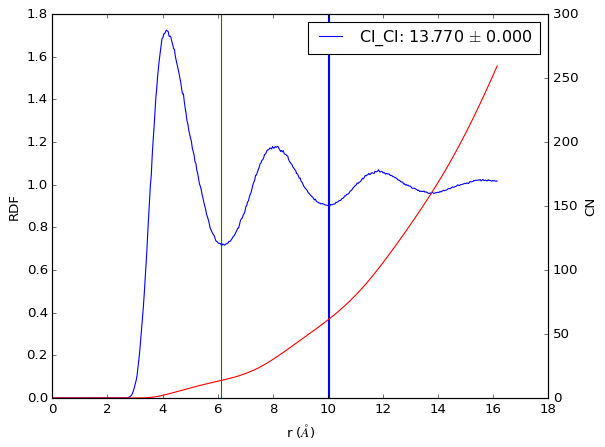

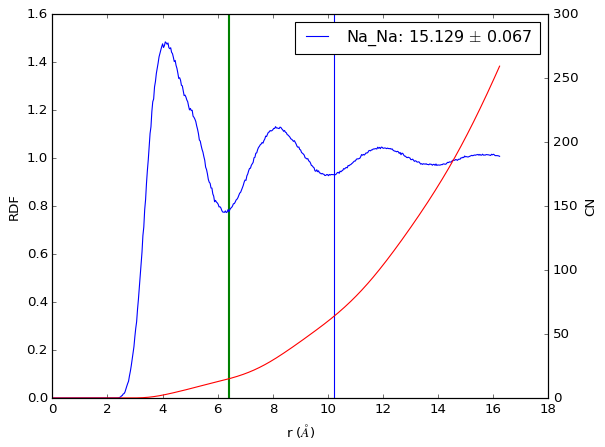

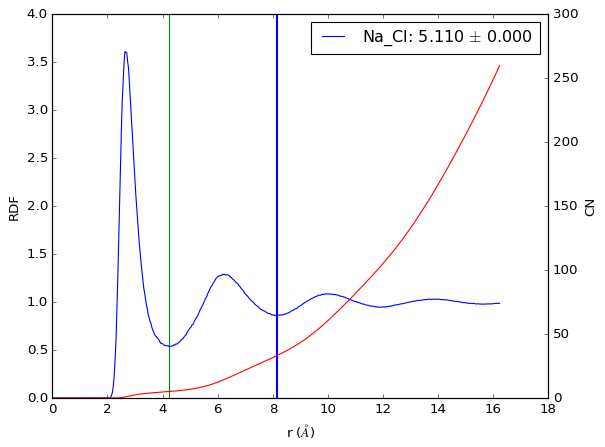

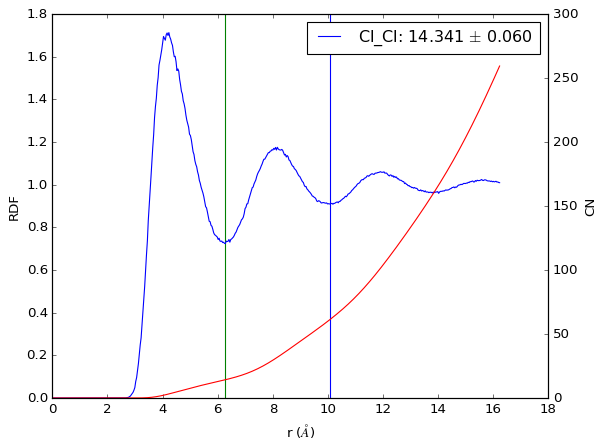

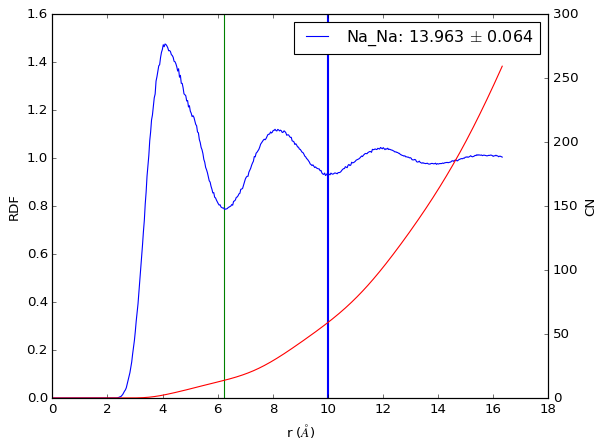

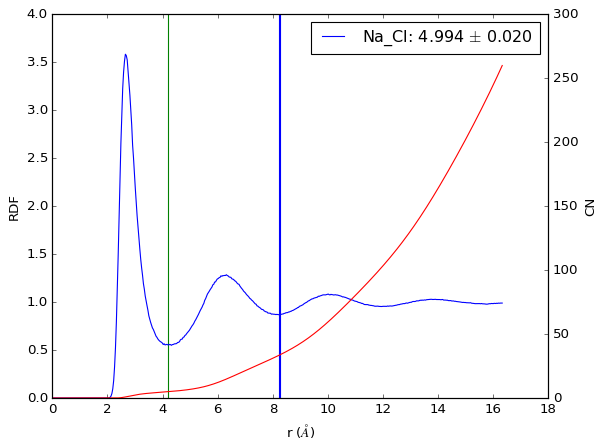

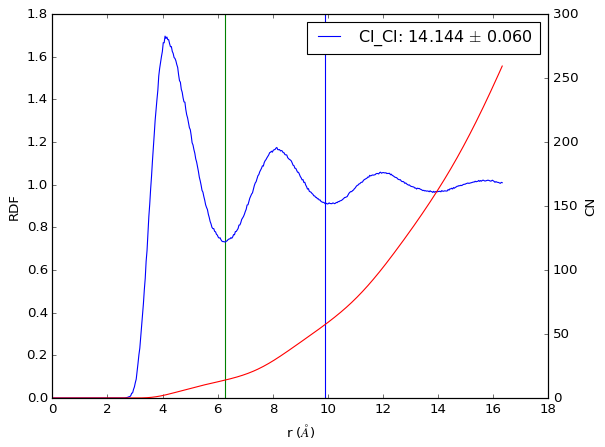

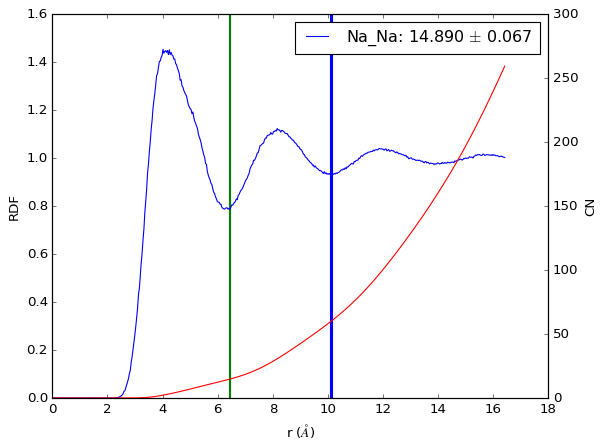

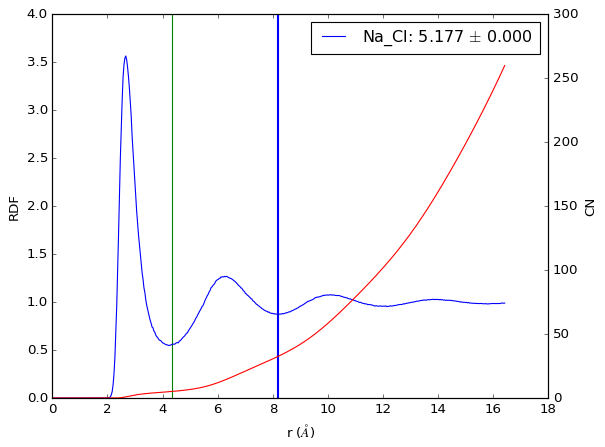

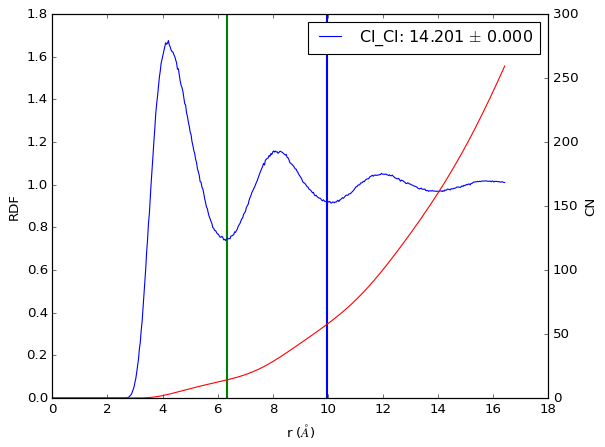

In [40]:
for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.CoordinationNumbers(savgol_order=2, 
                                                                      savgol_window_length = 41)

NaCl_1148K


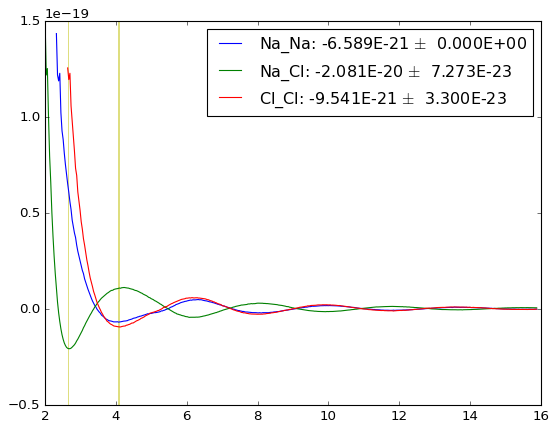

NaCl_1174K


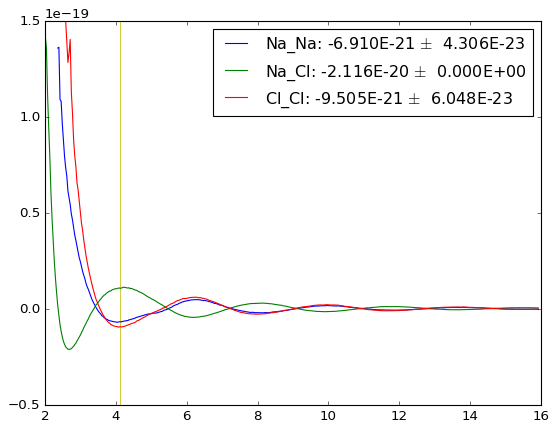

NaCl_1300K


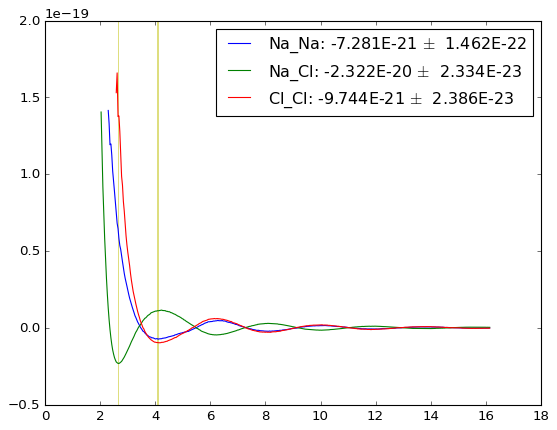

NaCl_1350K


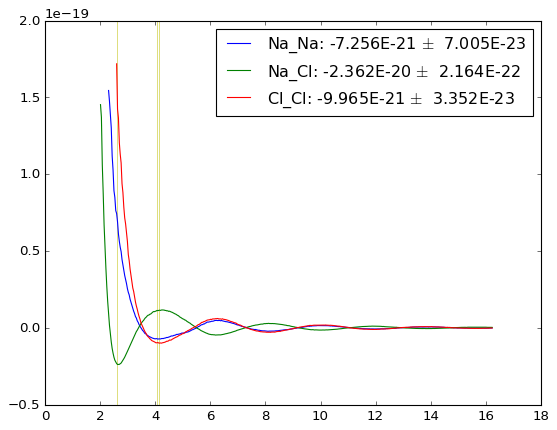

NaCl_1400K


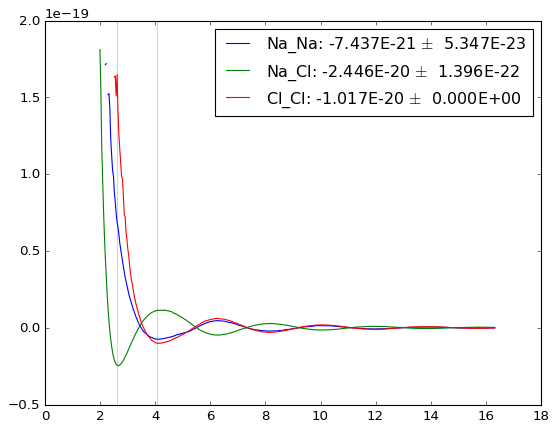

NaCl_1450K


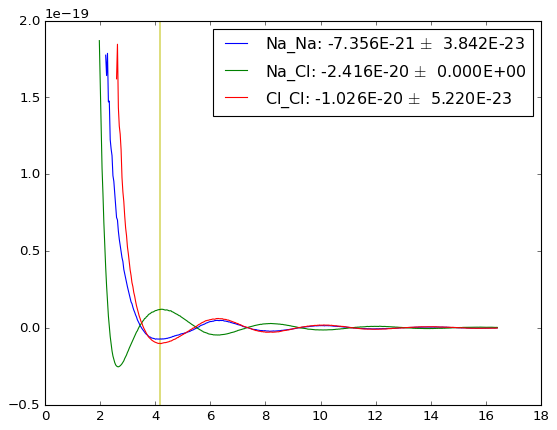

In [5]:
for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.PotentialOfMeanForce()

for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.StructureFactor()

In [6]:
temperatures = Molten_NaCl.get_attribute('temperature')
pomf = Molten_NaCl.get_properties({'analysis': 'Potential_of_Mean_Force', 'subjects': ["Na", "Cl"]})
cn = Molten_NaCl.get_properties({'analysis': 'Coordination_Numbers', 'subjects': ["Na", "Cl"]})

In [9]:
na_cl_pomf = np.array([[pomf[item][0].data[0].x, pomf[item][0].data[0].uncertainty] for item in pomf])
na_cl_cn = np.array([[cn[item][0].data[0].y, cn[item][0].data[0].uncertainty] for item in cn])  # data.x = shell, data.y = radius

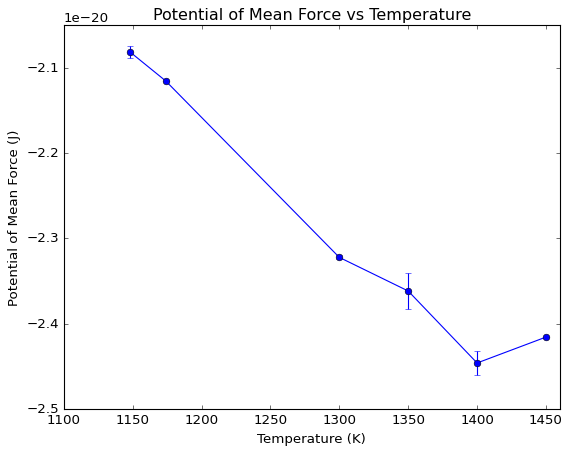

In [10]:
plt.errorbar(list(temperatures.values()), na_cl_pomf[:, 0], yerr=na_cl_pomf[:, 1], marker='o')
plt.xlabel('Temperature (K)')
plt.ylabel('Potential of Mean Force (J)')
plt.xlim(1100, 1460)
plt.title("Potential of Mean Force vs Temperature")
plt.show()

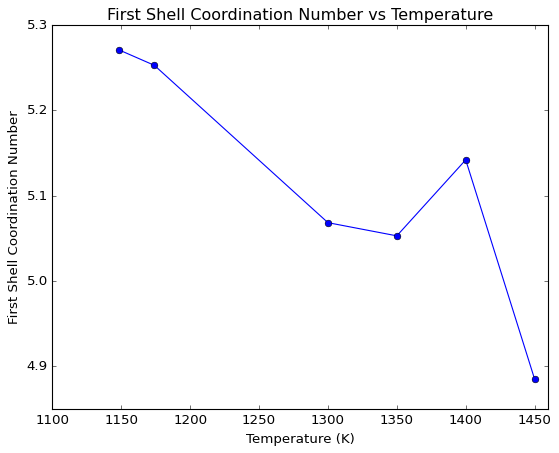

In [11]:
plt.errorbar(list(temperatures.values()), na_cl_cn[:, 0], yerr=na_cl_cn[:, 1], marker='o')
plt.xlabel('Temperature (K)')
plt.ylabel('First Shell Coordination Number')
plt.xlim(1100, 1460)
plt.title("First Shell Coordination Number vs Temperature")
plt.show()

In [23]:
# rdf for all temperatures
rdf = Molten_NaCl.get_properties({'property': 'RDF', 'subjects': ["Na", "Cl"]})

rdf_temp = np.array([rdf[item][0].data_array() for item in pomf])

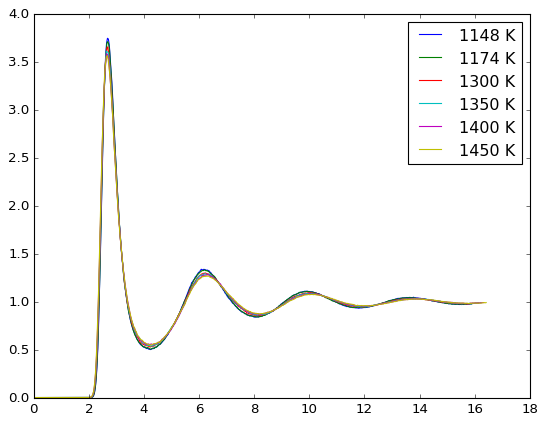

In [29]:
for rdf, temp in zip(rdf_temp, list(temperatures.values())):
    plt.plot(rdf[:, 0], rdf[:, 1], label=f"{temp} K")

plt.legend()

## Dyamics Analysis

Cl:  32%|█████████▎                   | 24/75 [01:06<02:21,  2.78s/it]


KeyboardInterrupt: 

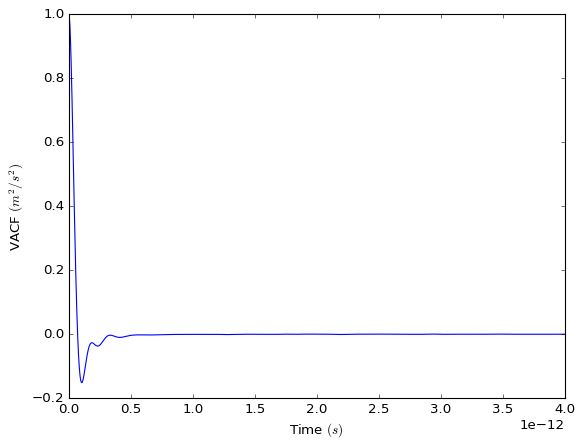

In [12]:
for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.GreenKuboDiffusionCoefficients(plot=True, 
                                                                                 data_range=2000, 
                                                                                 correlation_time=5000)

In [ ]:
for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.EinsteinDiffusionCoefficients(plot=True, 
                                                                                data_range=30000, 
                                                                                correlation_time=5000,
                                                                                save=False)

In [ ]:
for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.GreenKuboIonicConductivity(plot=True, 
                                                                             data_range=2000, 
                                                                             correlation_time=500)

In [ ]:
for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.EinsteinHelfandIonicConductivity(plot=True, 
                                                                             data_range=30000, 
                                                                             correlation_time=500)

In [ ]:
for item in Molten_NaCl.experiments:
    Molten_NaCl.experiments[item].run_computation.NernstEinsteinIonicConductivity()

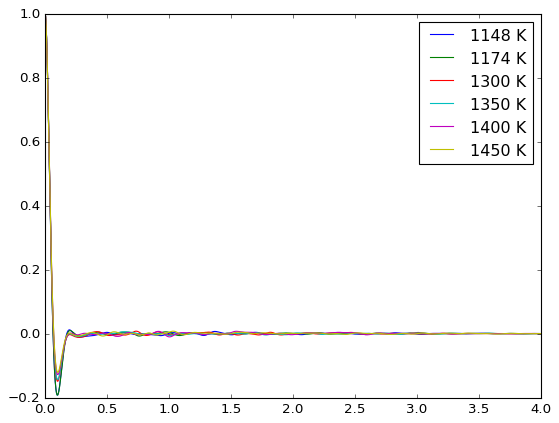

In [37]:
rdf = Molten_NaCl.get_properties({'analysis': 'Green_Kubo_Ionic_Conductivity', 'information': 'series'})  # currently JACF Array

rdf_temp = np.array([rdf[item][0].data_array() for item in pomf])
for rdf, temp in zip(rdf_temp, list(temperatures.values())):
    plt.plot(rdf[:, 0], rdf[:, 1], label=f"{temp} K")

plt.legend()

In [13]:
e_ic = Molten_NaCl.get_properties({'property': 'Ionic_Conductivity'})
diff = Molten_NaCl.get_properties({"property": 'Diffusion_Coefficients', 'subjects': ["Na"]})

In [14]:
gk_ic = Molten_NaCl.get_properties({'property': 'Ionic_Conductivity', 
                                    'data_range': 2000, 
                                    'analysis': 'Green_Kubo_Ionic_Conductivity'})
e_ic = Molten_NaCl.get_properties({'property': 'Ionic_Conductivity', 
                                    'data_range': 30000, 
                                    'analysis': 'Einstein_Helfand_Ionic_Conductivity'})
ene_ic = Molten_NaCl.get_properties({'property': 'Ionic_Conductivity',
                                        'data_range': 30000, 
                                        'analysis': 'Einstein_Nernst_Einstein_Ionic_Conductivity'})
gne_ic = Molten_NaCl.get_properties({'property': 'Ionic_Conductivity',
                                        'data_range': 2000, 
                                        'analysis': 'Green_Kubo_Nernst_Einstein_Ionic_Conductivity'})

In [15]:
# gk_pl = np.array([gk_ic[item][0].data_array() for item in gk_ic])[:, 0, [0,-1]]  # shorter, but less intuitive

gk_pl = np.array([[gk_ic[item][0].data[0].x, gk_ic[item][0].data[0].uncertainty] for item in gk_ic])
e_pl = np.array([[e_ic[item][0].data[0].x,e_ic[item][0].data[0].uncertainty]  for item in e_ic])
ic_ene = np.array([[ene_ic[item][0].data[0].x, ene_ic[item][0].data[0].uncertainty] for item in ene_ic])
ic_gne = np.array([[gne_ic[item][0].data[0].x, gne_ic[item][0].data[0].uncertainty] for item in gne_ic])

In [16]:
einstein_diff_Na = Molten_NaCl.get_properties(
    {'analysis': 'Einstein_Self_Diffusion_Coefficients', 'subjects': ["Na"]})
einstein_diff_Cl = Molten_NaCl.get_properties(
    {'analysis': 'Einstein_Self_Diffusion_Coefficients', 'subjects': ["Cl"]})
gk_diff_Na = Molten_NaCl.get_properties(
    {'analysis': 'Green_Kubo_Self_Diffusion_Coefficients', 'subjects': ["Na"]})
gk_diff_Cl = Molten_NaCl.get_properties(
    {'analysis': 'Green_Kubo_Self_Diffusion_Coefficients', 'subjects': ["Cl"]})

In [17]:
ein_Na = np.array([[einstein_diff_Na[item][0].data[0].x, 
                    einstein_diff_Na[item][0].data[0].uncertainty] for item in einstein_diff_Na])
ein_Cl = np.array([[einstein_diff_Cl[item][0].data[0].x, 
                    einstein_diff_Cl[item][0].data[0].uncertainty] for item in einstein_diff_Cl])

gk_Na = np.array([[gk_diff_Na[item][0].data[0].x, 
                   gk_diff_Na[item][0].data[0].uncertainty] for item in gk_diff_Na])
gk_Cl = np.array([[gk_diff_Cl[item][0].data[0].x, 
                   gk_diff_Cl[item][0].data[0].uncertainty] for item in gk_diff_Cl])

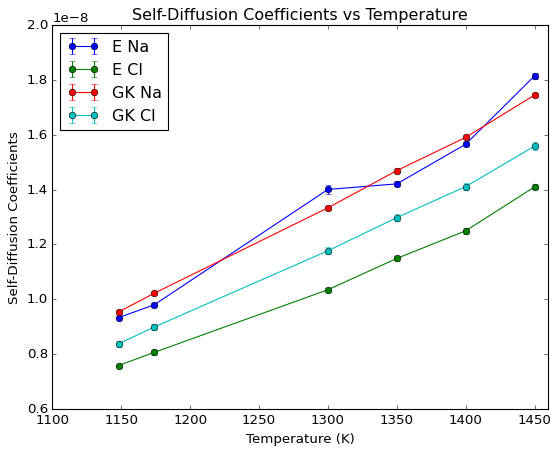

In [18]:
plt.errorbar(list(temperatures.values()), ein_Na[:, 0], yerr=ein_Na[:, 1], marker='o', label='E Na')
plt.errorbar(list(temperatures.values()), ein_Cl[:, 0], yerr=ein_Cl[:, 1], marker='o', label='E Cl')
plt.errorbar(list(temperatures.values()), gk_Na[:, 0], yerr=gk_Na[:, 1], marker='o', label='GK Na')
plt.errorbar(list(temperatures.values()), gk_Cl[:, 0], yerr=gk_Cl[:, 1], marker='o', label='GK Cl')
plt.xlabel('Temperature (K)')
plt.ylabel('Self-Diffusion Coefficients')
plt.xlim(1100, 1460)
plt.title("Self-Diffusion Coefficients vs Temperature")
plt.legend(loc='upper left')
plt.show()

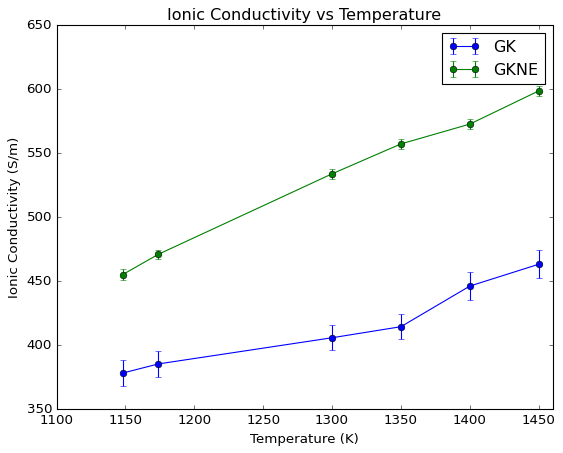

In [19]:
plt.errorbar(list(temperatures.values()), gk_pl[:, 0], yerr=gk_pl[:, 1], marker='o', label='GK')
plt.errorbar(list(temperatures.values()), ic_gne[:, 0], yerr=ic_gne[:, 1], marker='o', label='GKNE')
plt.xlabel('Temperature (K)')
plt.ylabel('Ionic Conductivity (S/m)')
plt.xlim(1100, 1460)
plt.title("Ionic Conductivity vs Temperature")
plt.legend()
plt.show()

# A closer look at the Database

Looking at the coordination number we can query the project or the experiment

In [57]:
cn = Molten_NaCl.get_properties({'analysis': 'Coordination_Numbers', 'subjects': ["Na", "Cl"]})
cn = cn['NaCl_1148K']
# or
cn = Molten_NaCl.experiments['NaCl_1148K'].export_property_data({'analysis': 'Coordination_Numbers', 'subjects': ["Na", "Cl"]})

for the coordination number (as well as most of the other calculators) we have two entries. One has the additional label `series`.
We can also query them using the key `information`

In [58]:
print(cn[0])  # {'analysis': 'Coordination_Numbers', 'subjects': ["Na", "Cl"], "information": None}
print(cn[1])  # {'analysis': 'Coordination_Numbers', 'subjects': ["Na", "Cl"], "information": 'series'}

Coordination_Numbers on [Na, Cl]
Coordination_Numbers on [Na, Cl] 	 series


both objects have the same structure and are mostly identical. They only differ in `obj.data` and `obj.information`.
Let us have a look at the properties:

In [61]:
print(cn[0].property)
print(cn[0].data_range)
print(cn[0].analysis)
print(cn[0].information)
print(cn[0].data)
print(cn[0].subjects)

Coordination_Numbers
1000
Coordination_Numbers
None
[x:1.0, x:2.0]
[Na, Cl]


The data attribute contains the results for the coordination number as a list. Each object of that list has 4 attributes `x, y, z, uncertainty`, where only `x` is mandatory.
In the case of coordination numbers `x` describes the shell and `y` the radius. The uncertainty is given by `uncertainty`

In [66]:
print(cn[0].data[0].x)
print(cn[0].data[0].y)
print(cn[0].data[0].uncertainty)

1.0
5.353936873747495
0.01967428967934644


In [64]:
print(cn[1].property)
print(cn[1].data_range)
print(cn[1].analysis)
print(cn[1].information)
print(cn[1].data[:5])  # sliced for a clearer presentation
print(cn[1].subjects)

Coordination_Numbers
1000
Coordination_Numbers
series
[x:0.03182364729458918, x:0.06364729458917837, x:0.09547094188376755, x:0.12729458917835673, x:0.15911823647294593]
[Na, Cl]


For the case of series data one might want to convert them into an numpy array which can easily be done with `obj.data_array()` wich gives an array of the shape `(length, 4)` where each element consists of the 4 attributes `x, y, z, uncertainty`. They are set to `None` if not available

In [72]:
print(cn[1].data_array().shape)
cn[1].data_array().mean()

(499, 4)


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'